In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_excel('stockx_data.xlsx')

y = data["Price_Percentage_change"]
X = sm.add_constant(data.drop(["Sale Price",'Price_Percentage_change', "Other States", "New York", "Texas"], axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=808)

# Finding the best ccp_alpha value
ccp_alphas = np.linspace(0, 0.01, 20) 
mse_scores = []

for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    mse_scores.append(np.mean((model.predict(X_test) - y_test)**2))

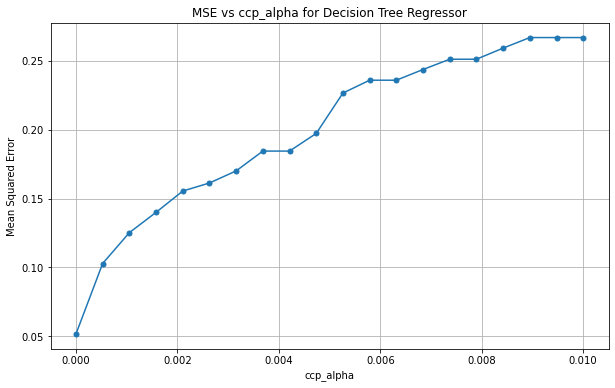

The best ccp_alpha value is: 0.0


In [3]:
# Plotting the MSE scores against ccp_alpha values
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, mse_scores, marker='o', linestyle='-', markersize=5)
plt.title('MSE vs ccp_alpha for Decision Tree Regressor')
plt.xlabel('ccp_alpha')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Find the ccp_alpha value with the lowest MSE
best_ccp_alpha = ccp_alphas[np.argmin(mse_scores)]
print(f"The best ccp_alpha value is: {best_ccp_alpha}")


In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

depth_range = range(1, 11) 

param_grid = {'max_depth': depth_range}

cart_model = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)

grid_search = GridSearchCV(cart_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
print(f"The optimal max_depth is: {best_max_depth}")

final_cart_model = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha, max_depth=best_max_depth)
final_cart_model.fit(X_train, y_train)

The optimal max_depth is: 10


DecisionTreeRegressor(max_depth=10)

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = final_cart_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"OSR² score: {r2}")

Mean Absolute Error (MAE): 0.1441788478564767
Mean Squared Error (MSE): 0.09190338923348217
Root Mean Squared Error (RMSE): 0.3031557177977717
OSR² score: 0.9594773177295352
